SyntaxError: ignored

Streaming output truncated to the last 5000 lines.
  inflating: keras_png_slices_data/keras_png_slices_train/case_269_slice_5.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_269_slice_6.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_269_slice_7.nii.png  
 extracting: keras_png_slices_data/keras_png_slices_train/case_269_slice_8.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_269_slice_9.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_0.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_1.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_10.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_11.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_12.nii.png  
  inflating: keras_png_slices_data/keras_png_slices_train/case_270_slice_13.nii.png  
  inflatin

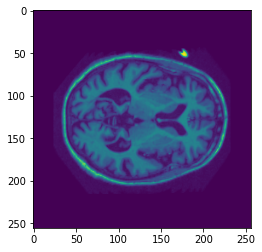

train_X shape: (1120, 256, 256)


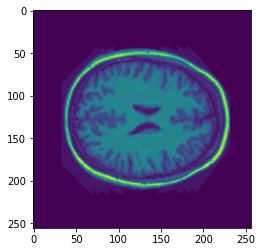

train_X shape: (544, 256, 256)


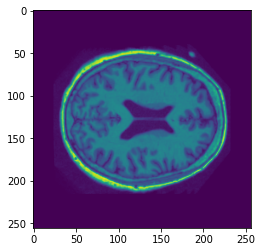

In [1]:
%run '/content/drive/My Drive/Colab Notebooks/Methods.ipynb'

# test script load and preprocess training images

# download oasis data and unzip files 
download_oasis()

# load training data set  
train_X = load_training ('/content/keras_png_slices_data/keras_png_slices_train')

# check loaded image
pyplot.imshow(train_X[2])
pyplot.show()

# pre- process training dataset 
train_X = process_training(train_X)

# load validaton data set and process it 
validate_X = load_training ('/content/keras_png_slices_data/keras_png_slices_validate')

# check loaded images
pyplot.imshow(validate_X[2])
pyplot.show()

# pre process validation data set
validate_X = process_training(validate_X)


# load test data set and process it 
test_X = load_training ('/content/keras_png_slices_data/keras_png_slices_test')

# check loaded images
pyplot.imshow(test_X[2])
pyplot.show()

# pre process test data set
test_X = process_training(test_X)

train_y shape: (9664, 256, 256)


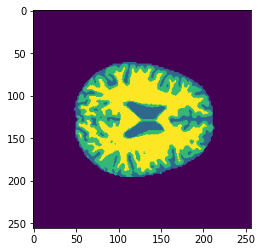

uint8
(9664, 256, 256, 4)


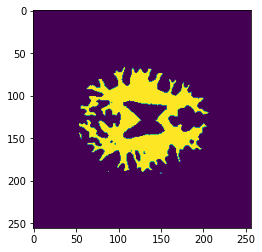

train_y shape: (1120, 256, 256)


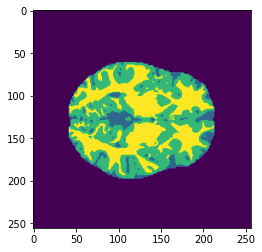

uint8
(1120, 256, 256, 4)


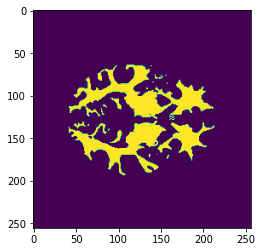

train_y shape: (544, 256, 256)


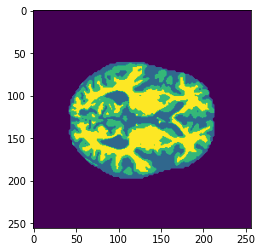

uint8
(544, 256, 256, 4)


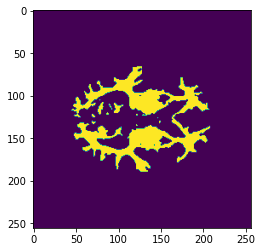

In [2]:

# load and pre process segmented training set 
train_Y = load_labels('/content/keras_png_slices_data/keras_png_slices_seg_train')
train_Y = process_labels(train_Y)

# check loaded images
pyplot.imshow(train_Y[2,:,:,3])
pyplot.show()


# load and pre process segmented validation set 
validate_Y = load_labels('/content/keras_png_slices_data/keras_png_slices_seg_validate')
validate_Y = process_labels(validate_Y)
 
# check loaded images
pyplot.imshow(validate_Y[2,:,:,3])
pyplot.show()

# load and pre process segmented test set 
test_Y = load_labels('/content/keras_png_slices_data/keras_png_slices_seg_test')
test_Y = process_labels(test_Y)
 
# check loaded images
pyplot.imshow(test_Y[2,:,:,3])
pyplot.show()

conv4 (None, 32, 32, 128)
convm (None, 16, 16, 256)
upsample 1 (None, 32, 32, 128)
concat 1 (None, 32, 32, 256)
localization 1 (None, 32, 32, 128)
Epoch 1/2
302/302 [==============================] - 56s 186ms/step - loss: 0.4213 - accuracy: 0.8447 - val_loss: 0.7721 - val_accuracy: 0.7780
Epoch 2/2
17/17 [==============================] - 1s 58ms/step - loss: 0.2954 - accuracy: 0.8675


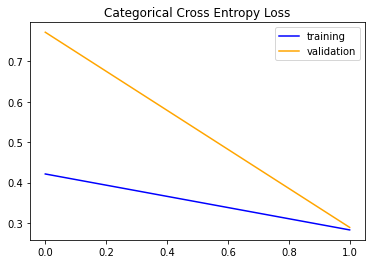

In [3]:

# create model ,set training paramters , train the model

# create a model instance and set training paramters 

model = unet_model()
opt= tf.keras.optimizers.Adam (learning_rate=.0005)
model.compile (optimizer=opt, loss= 'CategoricalCrossentropy' , metrics=['accuracy'])

# set early stop criteria 
ES = tf.keras.callbacks.EarlyStopping( monitor='val_accuracy',min_delta=.0001, patience=40, verbose=0, mode='max', restore_best_weights=True)

# record history of training to display loss over ephocs 
history = model.fit(train_X, train_Y,  validation_data= (validate_X, validate_Y) ,batch_size=32,shuffle='True',epochs=2, callbacks=[ES])

# evaluate against testing data 
model.evaluate(test_X,test_Y)

# save trained model weights 
model.save_weights('/content/drive/My Drive/modelweights/unet8')


# plot training and validation loss 
pyplot.title('Categorical Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
pyplot.legend(('training','validation'))

prediction


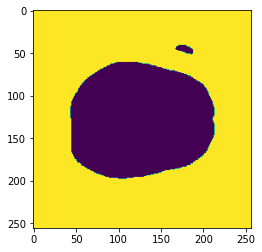

ground truth


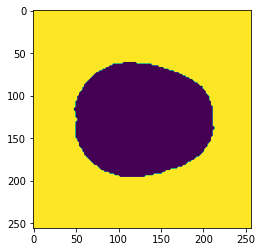

prediction


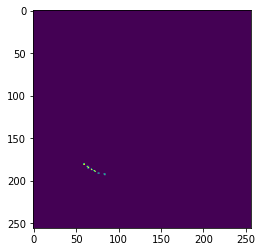

ground truth


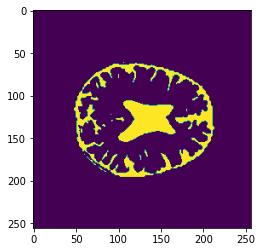

prediction


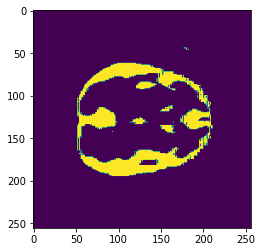

ground truth


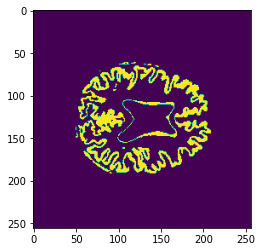

prediction


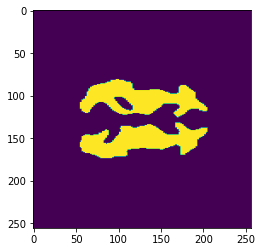

ground truth


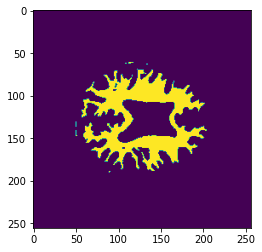

In [7]:
# validate output 
out = model.predict(test_X)
out_r = np.round(out)

im = 5

for i in range (4):
  print("prediction")
  pyplot.imshow(out_r[im,:,:,i])
  pyplot.show()
  print("ground truth")
  pyplot.imshow(test_Y[im,:,:,i])
  pyplot.show()


In [ ]:
'''
# load saved model and evaluate results
loaded_model = unet_model()
opt= tf.keras.optimizers.Adam (learning_rate=.0005)
loaded_model.compile (optimizer=opt, loss= 'CategoricalCrossentropy' , metrics=['accuracy'])
loaded_model.load_weights('/content/drive/My Drive/modelweights/unet8')
loaded_model.evaluate (test_X,test_Y)